### 0

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV

from sklearn.metrics import mean_squared_error, mean_absolute_error

### a)

In [14]:
iris = load_iris()

iris.keys()
iris['data'][:5]
# ... for rest of keys

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

### b)

In [15]:
# i've got absolutely no idea whats going on here

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df = pd.concat(
    [df, pd.DataFrame(iris["target"], columns=["species"])], axis="columns"
)

# recursively get df['species'] value and use it as index to get species name.
# this only works because the index of target_names matches the numering of the species column
df['specie_name'] = iris.target_names[df['species']]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,specie_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### c)

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
species,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


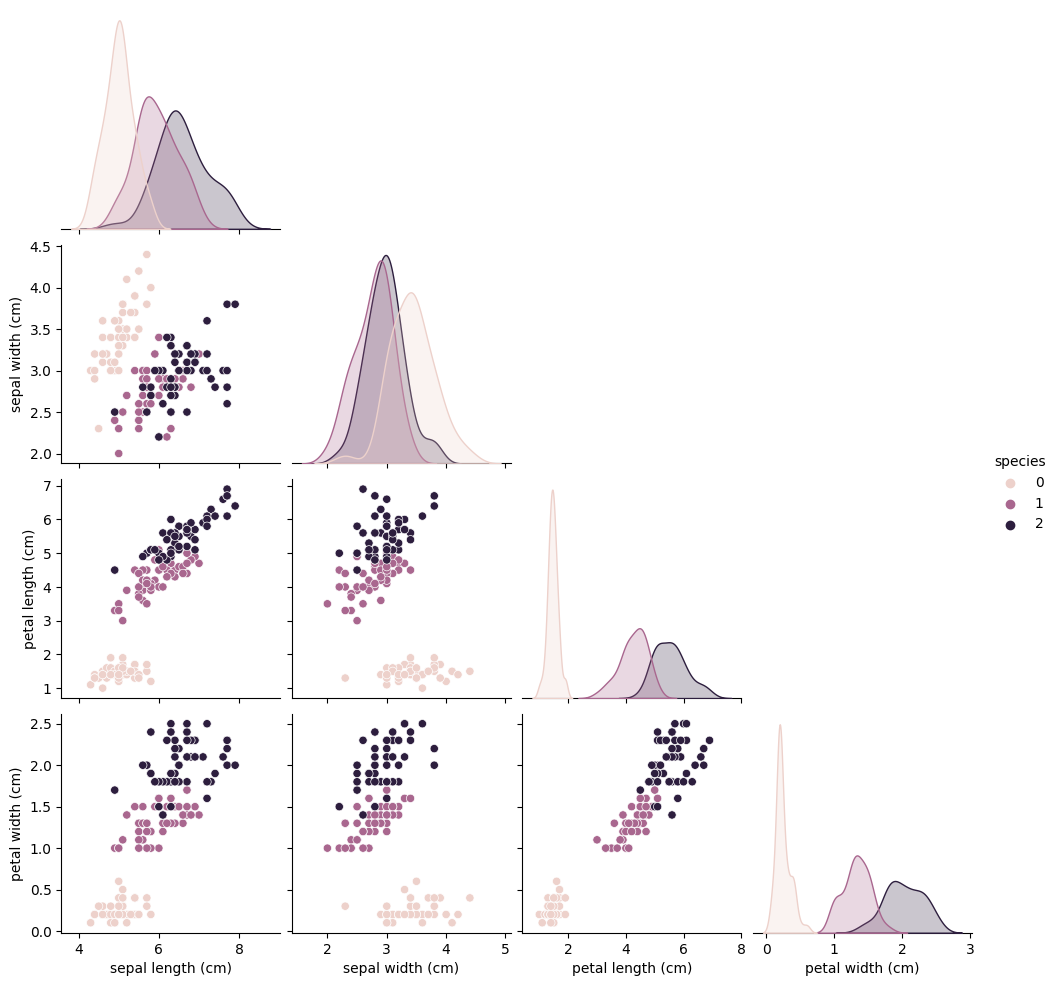

In [17]:
# Too lazy to do more exploration
sns.pairplot(data=df, hue='species', corner=True)

### d)

<AxesSubplot: >

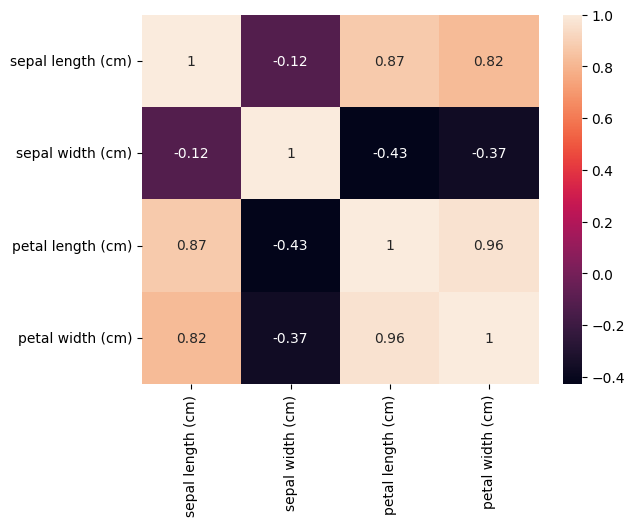

In [18]:
#fig = plt.figure(figsize=(10,4))

# drop none numeric columns (specie_name) to make pandas corr() happy.
# also droppping "species" because it isnt really a metric as the others.
numeric_df = df.drop(['species', 'specie_name'], axis=1)
sns.heatmap(numeric_df.corr(), annot=True)

### e)

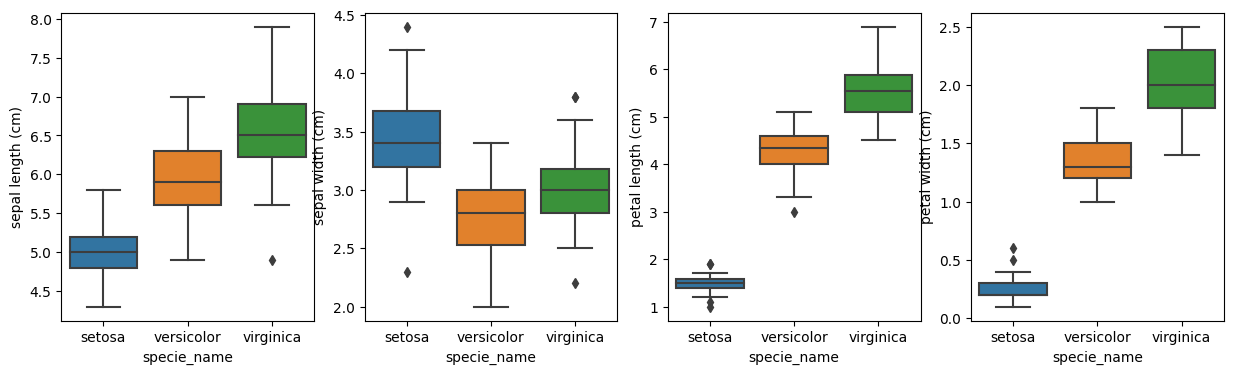

In [19]:
fig, ax = plt.subplots(1, 4, figsize=(15,4))

for i in range(0, 4):
    metric = df.iloc[:, i].name
    sns.boxplot(data=df, x="specie_name", y=metric, ax=ax[i])

### f) FINISH

### 1

In [20]:
# NOTE: No need for dummy encoding as response variable is already numeric

x = df.drop(['species', 'specie_name'], axis=1)
y = df['species']

x[:3], y[:3]

(   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                5.1               3.5                1.4               0.2
 1                4.9               3.0                1.4               0.2
 2                4.7               3.2                1.3               0.2,
 0    0
 1    0
 2    0
 Name: species, dtype: int32)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((100, 4), (50, 4), (100,), (50,))

In [22]:
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

scaled_x_test.mean(), scaled_x_test.std(), scaled_x_train.mean(), scaled_x_train.std()

(0.0636657509197856,
 1.0572097452539762,
 -2.0788926136106057e-16,
 0.9999999999999999)

### 2

In [44]:


model = LogisticRegressionCV(cv=10)
model.fit(scaled_x_train, y_train)

model.intercept_, model.coef_,


(array([  6.12301517,  16.01595587, -22.13897104]),
 array([[ -4.00559529,   4.73437076, -11.98907359, -11.92629624],
        [  3.33883989,   0.71289576,  -6.80610828,  -9.70913151],
        [  0.6667554 ,  -5.44726651,  18.79518186,  21.63542775]]))

In [46]:
y_pred = model.predict(scaled_x_test)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred)

MAE, MSE, RMSE

(0.02, 0.02, 0.1414213562373095)